In [351]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [352]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)
# MSE -> probability

In [353]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [354]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [355]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [356]:
# Задача №1

def calc_logloss(y, y_pred):
    y_pred = np.where(0, 0.001, y_pred)
    y_pred = np.where(1, 0.999, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [357]:
### Logistic Regression

In [372]:
def eval_model(X, y, iterations, alpha=1e-4):
    err_0 = 0
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations/10) == 0:
            print(i, W, err)
        
        # Задача 2, ставим условие выхода из цикла
        if abs(err - err_0) < 1e-10:
            print(i, W, err)
            break
        else:
            err_0 = err

    return W, y_pred

In [373]:
W, y_pred = eval_model(X_st, y, iterations=1000, alpha=1e-5)

2 [ 0.49670636 -0.13828796  0.64768815  1.52301833] 3.4543778896578594


In [360]:
np.dot(W, X_st)

array([1.24696809, 1.51411278, 2.96562932, 1.38054044, 3.76234777,
       1.78597308, 5.07557635, 5.05199828, 1.18018192, 3.29956018])

In [361]:
# Задача 3
def calc_pred_proba(X, W):
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [362]:
y_pred_proba = calc_pred_proba(X_st,W)

In [364]:
y_pred_proba

array([0.77677458, 0.81966992, 0.950997  , 0.79907778, 0.9772982 ,
       0.85643285, 0.9937913 , 0.99364412, 0.76498051, 0.96441372])

In [367]:
# Задача 4
def calc_pred(X, W):
    z2 = np.dot(W, X)
    y_pred2 = sigmoid(z2)
    y_pred2 = np.where(y_pred2 > 0.5,1,0)
    return y_pred2    

In [368]:
y_pred2 = calc_pred(X_st,W)

In [369]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [370]:
# Задача 5

In [374]:
import pandas as pd

df = pd.DataFrame({
    "y_true": y,
    "y_pred": y_pred
})

df = df.sort_values(by="y_pred", ascending=False)
df["y_pred"] = df["y_pred"] / 10
df

,y_true,y_pred
6,1.0,0.099379
7,0.0,0.099365
4,1.0,0.097730
9,1.0,0.096442
2,1.0,0.095100
5,0.0,0.085643
1,0.0,0.081967
3,0.0,0.079908
0,0.0,0.077678
8,1.0,0.076498


In [375]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

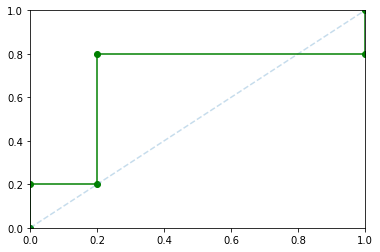

In [377]:
fpr, tpr, _ = roc_curve(y, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [378]:
roc_auc_score(y, y_pred)

0.6800000000000002

In [379]:
np.random.randint(X.shape[1])

6

In [382]:
precision, recall = 0.68, 0.32

f1_clssic = 2 * precision * recall / (precision + recall)
print(f1_clssic)

0.43520000000000003


In [383]:
betta = 0.5
f1_weighted = (1 + betta**2) * precision * recall / (betta**2 * precision + recall)
f1_weighted

0.5551020408163265